In [1]:
from load_css import load_css
load_css('styles.css')

## <p class="level2-heading">Introduction</p>

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import palmerpenguins as pp

In [3]:
#load data
data = pp.load_penguins()

In [4]:
#see all column-names
print(data.columns.tolist())

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']


In [5]:
#drop all NA values
data.dropna(inplace = True)

In [6]:
#check for null
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### <p class="level3-heading">1. Simple Scatter Plot</p>

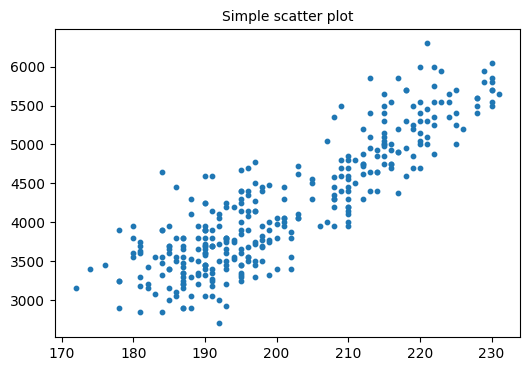

In [7]:
#flipper length with body mass
fig, ax = plt.subplots(1, 1, figsize = (6,4))
ax.scatter(data.flipper_length_mm, data.body_mass_g, s=10)
plt.title('Simple scatter plot', fontsize = 10)
plt.show()

### <p class="level3-heading">2. Scatter plot with grouping based on gender</p>

Although, this method colors the data points based on gender, legends cannot be added conviniently to the plot.

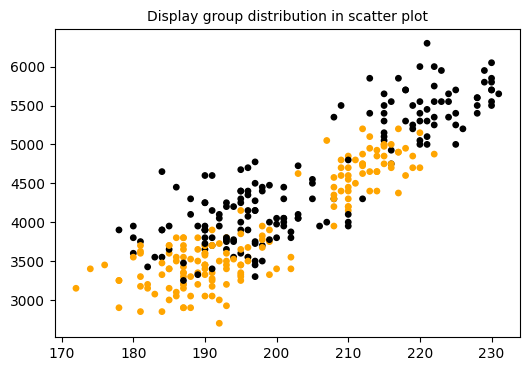

In [8]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.scatter(data.flipper_length_mm, 
           data.body_mass_g, 
           c=data.sex.map({'male':'black', 'female':'orange'}),
           s = 15
          )
plt.title('Display group distribution in scatter plot', fontsize = 10)
plt.show()

### <p class="level3-heading">3. Scatter plot with legend for 2 groups</p>

- First, create a list of colors using ___ListedColormap___ class.
- Then, create a numerical representation of the categories {0,1,2,...}.
- Then, create a column in the dataframe mapping those categories with their numerical counterpart.
- Then use this numerical representation inside __`ax.scatter()`__ to set __color__ and assign the color-map list to __cmap__.

In [9]:
#define the colormap
gender_colors = ListedColormap(['orange', 'black'])
#create gender mapping (numerical)
gender_map = {'female':0, 'male':1}
#create a column in data with numerical representation of gender
data['sex_map'] = data['sex'].map(gender_map)
legend_labels = {'female':'orange', 'male':'black'}

#### Table with code explanation:

<table style="border-collapse: collapse; border: 1px solid black;">
    <thead style="background-color: lightblue;">
        <tr>
            <th style="border: 1px solid black; padding: 5px; font-weight: bold;">Code</th>
            <th style="border: 1px solid black; padding: 5px; font-weight: bold;">Explanation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;"><code>c=data.sex_map</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;">"sex_map" column contains 0s and 1s for female/male. Use this 0,1 values to identify group.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;"><code>cmap=gender_colors</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;">assign the color-map list created earlier.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;"><code>handles</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;">it contains each legend key and its features. here, an orange dot for female & black dot for male.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;"><code>plt.Line2D([0],[0])</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;">used to create dots as legend keys. these are dummy numbers and can be any other number like [1],[1] and so on...</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;"><code>plt.Line2D(color='w')</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;">by default, this function creates lines as legend keys, not dots. Using color='w' makes the line invisible leaving the 'o' marker as the only visible key.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;"><code>plt.Line2D(linestyle='')</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;">To remove the line completely, (and not the <em><strong>make-line-invisible</strong></em> workaround), this argument can also be used.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;"><code>for color in legend_labels.values()</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #FFFFFF;">this whole line in plot-code below is a list comprehension. It loops over each "value" (orange, black) in legend-labels dictionary and creates each legend-key, then stores it in <code>handles</code>.</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;"><code>ax.legend(handles...)</code></td>
            <td style="border: 1px solid black; padding: 5px;background-color: #F0FFFF;">This plots the legend keys on the graph.</td>
        </tr>
    </tbody>
</table>

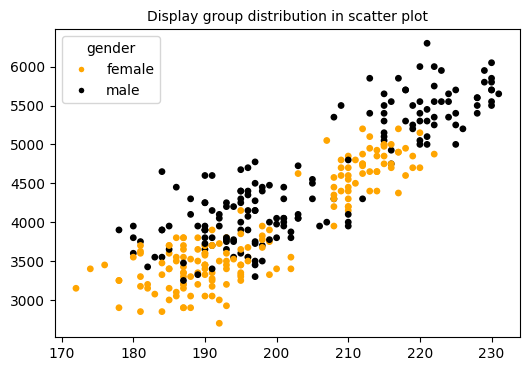

In [10]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.scatter(data.flipper_length_mm, 
           data.body_mass_g, 
           c=data.sex_map,
           cmap=gender_colors,
           s = 15
          )
plt.title('Display group distribution in scatter plot', fontsize = 10)
#create legend
#color = 'w' gives invisible color to the line-element in legend key. 
#by default, matplotlib creates a line-key. to hide the entire line and only keep dot, use color='w', also linestyle=''
handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=5, color = 'w') for color in legend_labels.values()]
ax.legend(handles, legend_labels.keys(), title="gender")
plt.show()

### <p class="level3-heading">4. Scatter plot with legend for 3 groups</p>

In [11]:
#colormap for species
species_cmap = ListedColormap(['steelblue', 'orange', 'red'])
#create species mapping
species_mapping = {'Adelie':0, 'Gentoo':1, 'Chinstrap':2}
#create column in dataframe for these mappings
data['species_map'] = data['species'].map(species_mapping)
#species labels encoding
species_labels = {'Adelie':'orange', 'Chinstrap':'steelblue', 'Gentoo':'red'}

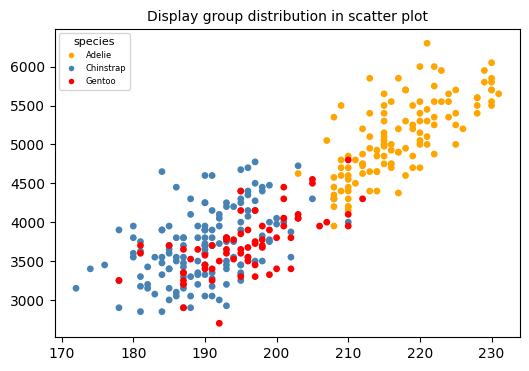

In [12]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.scatter(data.flipper_length_mm, 
           data.body_mass_g, 
           c=data.species_map,
           cmap=species_cmap,
           s = 15
          )
plt.title('Display group distribution in scatter plot', fontsize = 10)
#create legend
#color = 'w' gives invisible color to the line-element in legend key. 
handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=5, color = 'w') for color in species_labels.values()]
ax.legend(handles, species_labels.keys(), title="species", fontsize = 6, title_fontsize = 8)
plt.show()

### <p class="level3-heading">5. Different markers for different groups</p>

In [13]:
#define markers for each gender in a dictionary
gender_markers = {'male':'o', 'female':'x'}
#to get all items
gender_markers.items()

dict_items([('male', 'o'), ('female', 'x')])

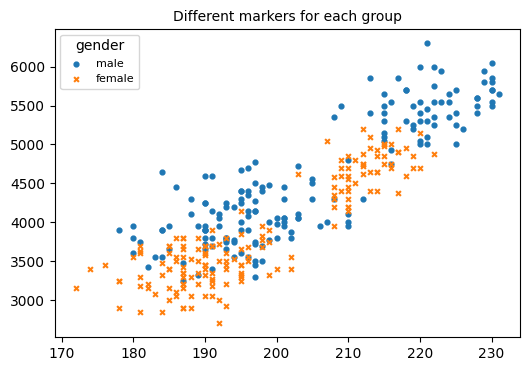

In [14]:
fig, ax = plt.subplots(1,1, figsize = (6,4))

for gender, marker in gender_markers.items():
    data_subset = data[data.sex == gender]
    ax.scatter(data_subset.flipper_length_mm,
              data_subset.body_mass_g,
              marker = marker,
              label = gender,s=12)
ax.legend(title='gender', fontsize = 8, title_fontsize = 10)
plt.title('Different markers for each group', fontsize = 10)
#plt.xlim(0,250)
#plt.ylim(0,6500)
plt.show()

### <p class="level3-heading">6. Subplots with different groups coloring</p>

- **Subplot 1:** Shows scatter plot with flipper length and body mass, colored by gender to explore if gender impacts flipper length.
- **Subplot 2:** Shows scatter plot colored by species to check if different species affect flipper length and body mass.
- **Subplot 3:** Shows scatter plot colored by island to see if location influences the relationship between flipper length and body mass.

In [24]:
categories = ['sex', 'species', 'island']

#create color-maps
sex_cmap = ListedColormap(['orange', 'black'])
species_cmap = ListedColormap(['steelblue', 'black', 'orange'])
island_cmap = ListedColormap(['steelblue', 'black', 'orange'])

#create numerical representation of each category
sex_mapping = {'male':0, 'female':1}
species_mapping = {'Adelie':0, 'Gentoo':1, 'Chinstrap':2}
island_mapping = {'Torgersen':0, 'Biscoe':1, 'Dream':2}

#create columns in dataframe with numerical representation of each category
data['sex_map'] = data['sex'].map(sex_mapping)
data['species_map'] = data['species'].map(species_mapping)
data['island_map'] = data['island'].map(island_mapping)

#legend labels encoding
species_labels = {'Adelie':'black', 'Chinstrap':'steelblue', 'Gentoo':'orange'}
island_labels = {'Torgersen':'black', 'Biscoe':'steelblue', 'Dream':'orange'}
sex_labels = {'male':'black', 'female':'orange'}

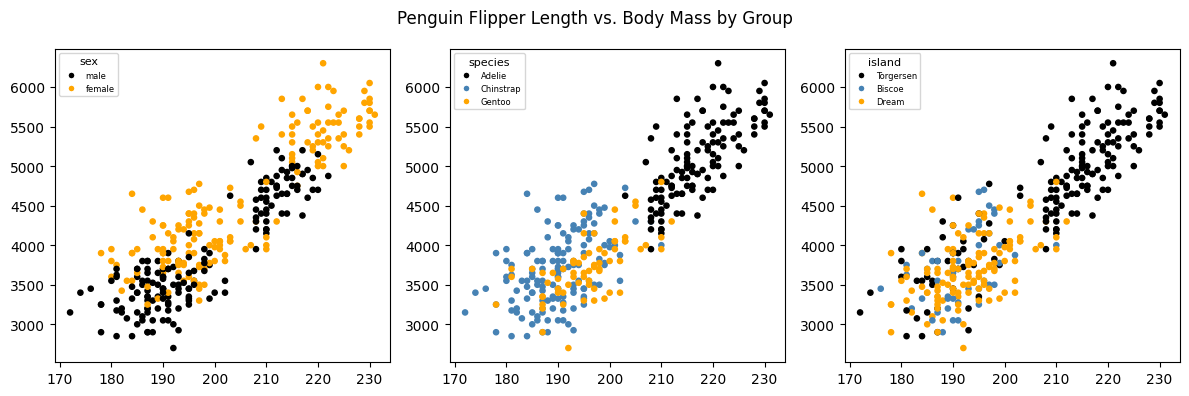

In [39]:
#plot
fig, axes = plt.subplots(1, 3, figsize = (12,4))

for i, category in enumerate(categories):
    #name of corresponding numerical column for the current category
    feature_map = f"{category}_map"
    #name of the color-map created above
    color_map = globals().get(f"{category}_cmap")
    #name of the labels-list for current feature
    legend_label = globals().get(f"{category}_labels")
    #scatter plot
    axes[i].scatter(x=data.flipper_length_mm,
              y = data.body_mass_g,
              c=data[feature_map],
              cmap = color_map, s=14)
    #create legend keys for this plot
    handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=5, color='w') for color in legend_label.values()]
    #add legend to plot
    axes[i].legend(handles, legend_label.keys(), title = f"{category}", fontsize = 6, title_fontsize=8)

plt.suptitle('Penguin Flipper Length vs. Body Mass by Group')
plt.tight_layout()
plt.show()